## HW1

### 1a

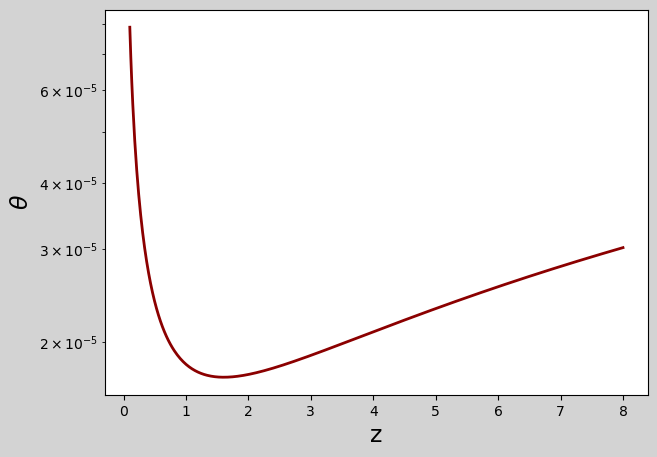

The minimum theta of 3.54" occurs at z = 1.61. 


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize_scalar

def X(z, Omega_m=.3, Omega_lambda=.7, h=.7):
    H_0 = 100*h # [km/s/Mpc]
    def f(z):
        return H_0**(-1)*(Omega_m*(1+z)**3 + Omega_lambda)**(-1/2) * 3*10**5 # returns in Mpc
    return quad(f, 0, z,)[0]

def theta(z, l=.03, Omega_m=.3, Omega_lambda=.7, h=.7):
    """
    Takes: z and l in Mpc
    Gives: angular size
    """
    return l*(1+z)/X(z)

zs = np.linspace(.1,8, 500)
thetas = [theta(z, l=.03) for z in zs] # l in Mpc

fig,ax = plt.subplots(figsize=(7,5))
fig.set_facecolor('lightgray')
ax.set_yscale('log')
ax.set_xlabel("z",fontsize=17)
ax.set_ylabel(r"$\theta$", fontsize=17)
ax.plot(zs,thetas,color='darkred', linewidth=2)
plt.show()

min_info = minimize_scalar(theta, bounds=(.1,7))
min_theta = min_info.fun * 206265
print(f"The minimum theta of {min_theta:.2f}\" occurs at z = {min_info.x:.2f}. ")

### 1b

In [4]:
difference = 5*np.log10(2*X(1)) - 5*np.log10(1.1*X(.1))
print(f"m(z=1) - m(z=.1) = {difference:.2f}")

m(z=1) - m(z=.1) = 5.79


### 1c

In [5]:
true_X = X(1) - X(.5)

# function to minimize to find true z
def similarity_to_correct_z(z):
    return X(z) - true_X
min_info = minimize_scalar(similarity_to_correct_z, bounds=(.1,7))
true_z = min_info.x

D_A = true_X/(1+true_z)

print(f"These observers have an angular distance of D_A = {D_A:.2f} Mpc")

These observers have an angular distance of D_A = 1287.43 Mpc


### 1d

In [6]:
omega = (3*1500/(X(1)-X(.5))**3) * (180**2 * 60**2 / np.pi**2)
print(f"Omega = {omega:.2f} arcmin^2")

Omega = 18.72 arcmin^2


In [ ]:
# corrections
omega = (3*1500/(X(1)**3-X(.5)**3)) * (180**2 * 60**2 / np.pi**2)
print(f"Omega = {omega:.2f} arcmin^2")

Omega = 1.81 arcmin^2


### 2

In [3]:
mu = 1.4
m_H = 1.67e-27 # kg
k_B = 1.38e-23 # J K^-1
G = 6.67e-11 # m^3 kg^-1 s^-2
def get_jeans(n_H, T):
    n_H = n_H / 1e6 # convert cm^-3 to m^-3
    c_s = ((k_B*T)/(mu*m_H))**.5
    rho = n_H * mu * m_H
    lam = (15*c_s**2 / (4*np.pi*G*rho))**.5
    M_j = 4/3 * np.pi * lam**3 * rho

    return lam, M_j

inputs = [[1e6,10],\
          [1,1e4],\
          [1e-5,1e6]]


for input in inputs:
    n_H = input[0]
    T = input[1]
    lam, M_j = get_jeans(n_H, T)
    print(f"({n_H:.0e} cm^-3, {T:.0e} K)  ->  (lam={lam:.1e} m, M_j={M_j:.1e} kg)")

(1e+06 cm^-3, 1e+01 K)  ->  (lam=6.7e+20 m, M_j=3.0e+36 kg)
(1e+00 cm^-3, 1e+04 K)  ->  (lam=2.1e+25 m, M_j=9.4e+43 kg)
(1e-05 cm^-3, 1e+06 K)  ->  (lam=6.7e+28 m, M_j=3.0e+49 kg)
